In this notebook we define the BZ map and its associated constants.

The BZ map was introduced in [MT], it is a $C^1$ map on $[0, 1]$
piecewise defined.

We need to compute some constants to guarantee continuity of the derivative and some dynamical properties.

On $[0, \frac{1}{8}]$ the map is defined by 
$$
T_{a,b}(x)=\left(a-\left(\frac{1}{8}-x\right)^{\frac{1}{3}} \right)e^{-x}+b
$$

On $[\frac{1}{8}, 0.3]$ the map is defined by
$$
T_{a,b}(x)=\left(a+\left(x-\frac{1}{8}\right)^{\frac{1}{3}} \right)e^{-x}+b
$$

On $[0.3, 1]$ it is defined by 
$$
T_{b,c}(x)= c\left(10x e^{\frac{-10x}{3}}\right)^{19}+b.
$$

We first compute $a, c$ such that $T$ and $T'$ are continuous
in $0.3$.

In [122]:
import Pkg; Pkg.activate("../")

  Activating project at `~/code/RigorousInvariantMeasures.jl`


In [123]:
using Symbolics
@variables a, b, c, x

expr_T_l = (a+(x-1//8)^(1//3))*exp(-x)+b

b + (a + (x - (1//8))^(1//3))*exp(-x)

In [225]:
expr_T_r = c*(BigInt(10)*x*exp(-Interval{BigFloat}(10)/3*x))^(19)+b

b + (10000000000000000000//1)*c*(x^19)*(exp([-3.33334, -3.33333]₁₀₂₄x)^19)

In [226]:
val_l = substitute(expr_T_l, (Dict(x=> 3//10)))

b + 0.41437257578452685 + 0.7408182206817179a

In [227]:
val_r = substitute(expr_T_r, (Dict(x=> BigInt(3)//BigInt(10))))

b + [6.51191, 6.51192]₁₀₂₄c

In [228]:
eq_val = Equation(val_r, val_l)

b + [6.51191, 6.51192]₁₀₂₄c ~ b + 0.41437257578452685 + 0.7408182206817179a

In [229]:
D = Differential(x)

der_l = expand_derivatives(D(expr_T_l))

(1//3)*((x - (1//8))^(-2//3))*exp(-x) - (a + (x - (1//8))^(1//3))*exp(-x)

In [230]:
der_val_l = substitute(der_l, (Dict(x=> BigInt(3)//BigInt(10))))

0.7892810967324320381784673767811606490018338436745474017138947471601287914136967386557768568408771934653575171844460204125540521426432097883228079862053730678324876354931503438634545712704641447815601792204001932324679419878296398314943500205573421355692532594717650120251448464665081525197041449837562002611027 + -0.4143725757845268601359959883623735943487139086638386408239274178252921207587749444227868590930023097214399121350615428164788416116347053663516921006631187585868482352302471247667524248720990636947017943757708733886928519842960794326377252781919613860753960697034597578904864704462029127261505510622045756945867 - 0.7408182206817178660668737793178168721822512319990063482953100668080982468773547710143739510096639709564605181002112681490924651726365380646988733107087985500318057152203012374338452128662074536217166657062898161274796579831351534167668675028095890837172971303967639760046449100717485978612091037249649270426333a

In [231]:
der_r = expand_derivatives(D(expr_T_r))

(190000000000000000000//1)*c*(x^18)*(exp([-3.33334, -3.33333]₁₀₂₄x)^19) - [6.33333e+20, 6.33334e+20]₁₀₂₄c*(x^19)*(exp([-3.33334, -3.33333]₁₀₂₄x)^19)

In [232]:
der_val_r = substitute(der_r, (Dict(x=> BigInt(3)//BigInt(10))))

[-2.53481e-304, 2.47785e-304]₁₀₂₄c

In [233]:
der_eq = Equation(der_val_l, der_val_r)

0.7892810967324320381784673767811606490018338436745474017138947471601287914136967386557768568408771934653575171844460204125540521426432097883228079862053730678324876354931503438634545712704641447815601792204001932324679419878296398314943500205573421355692532594717650120251448464665081525197041449837562002611027 + -0.4143725757845268601359959883623735943487139086638386408239274178252921207587749444227868590930023097214399121350615428164788416116347053663516921006631187585868482352302471247667524248720990636947017943757708733886928519842960794326377252781919613860753960697034597578904864704462029127261505510622045756945867 - 0.7408182206817178660668737793178168721822512319990063482953100668080982468773547710143739510096639709564605181002112681490924651726365380646988733107087985500318057152203012374338452128662074536217166657062898161274796579831351534167668675028095890837172971303967639760046449100717485978612091037249649270426333a ~ [-2.53481e-304, 2.47785e-304]₁₀₂₄c

In [234]:
z = Symbolics.solve_for(der_eq, a)

[0.506073, 0.506074]₁₀₂₄ + [-3.34474e-304, 3.42163e-304]₁₀₂₄c

In [235]:
typeof(z)

Num

In [236]:
der_l_func = Symbolics.build_function(der_l, a, x, expression = Val(false))

RuntimeGeneratedFunction(#=in Symbolics=#, #=using Symbolics=#, :((a, x)->begin
          #= /home/isaia/.julia/packages/SymbolicUtils/qulQp/src/code.jl:349 =#
          #= /home/isaia/.julia/packages/SymbolicUtils/qulQp/src/code.jl:350 =#
          #= /home/isaia/.julia/packages/SymbolicUtils/qulQp/src/code.jl:351 =#
          (+)((*)((*)(-1, (+)(a, (^)((+)(-1//8, x), 1//3))), (exp)((*)(-1, x))), (*)((*)(1//3, (^)((inv)((+)(-1//8, x)), 2//3)), (exp)((*)(-1, x))))
      end))

In [237]:
using IntervalArithmetic

val_der_l = der_l_func(a, Interval{BigFloat}(3)/10)
val_der_func(a) = der_l_func(a, Interval{BigFloat}(3)/10)

val_der_func (generic function with 1 method)

In [238]:
using DualNumbers
val_der_der_a(a) = val_der_func(Dual(a, 1)).epsilon

val_der_der_a (generic function with 1 method)

In [239]:
function root(f, f′, x, ϵ; max_iter = 100)
	for i in 1:max_iter
		x_old = x
		x_mid = Interval(mid(x))
		x = intersect(x, x_mid - f′(x) \ f(x_mid))
		if x_old == x || isempty(x) || diam(x) < ϵ
			return x
		end
	end
	@info "Maximum iterates reached" max_iter, x, f(x)
	return x
end

root (generic function with 1 method)

In [240]:
setprecision(BigFloat, 1024)
A = root(val_der_func, val_der_der_a, Interval{BigFloat}(0,1), 10^(-30))

[0.506073, 0.506074]₁₀₂₄

In [241]:
using IntervalArithmetic
A, diam(A)

([0.506073, 0.506074]₁₀₂₄, 1.056910082790920656967860540732891930504127590719607619512830523021422106536611143030784500530942734767931986372242010227447406226737893551706605883054416440037119546927701106977814820035227227134162743397297689273748978244133159042912625500642233310485081028833037802056665806194815529895921683031225989500715e-307)

In [242]:
sub_eq_val_A = substitute(eq_val, Dict(a=>A))

b + [6.51191, 6.51192]₁₀₂₄c ~ [0.789281, 0.789282]₁₀₂₄ + b

In [243]:
z = Symbolics.solve_for(sub_eq_val_A, c)

[0.121205, 0.121206]₁₀₂₄

In [244]:
C = Symbolics.value(z)

[0.121205, 0.121206]₁₀₂₄

In [245]:
C, diam(C)

([0.121205, 0.121206]₁₀₂₄, 8.483094085558705273031512234829790494835760925512640103984560776882466907728063121694454543735198265900506732724574029457143655240922566665013547219252553005561091100340758884953513687124850112524200966741468295486669430643700355476009230991996872623630255626159908674402186076037335174164634561171682284150472e-308)

We have now found the value of $A$ and $C$

In [246]:
T_left_leq_1_8(x, b) = (A-abs(1//8-x)^(Interval(1)/3))*exp(-x)+b

T_left_leq_1_8 (generic function with 1 method)

In [247]:
using Plots

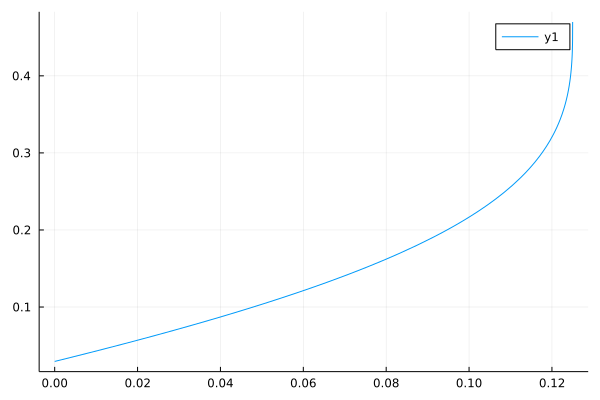

In [248]:
plot(x->mid(T_left_leq_1_8(x, 0.023288528303070)), 0, 1//8)

In [249]:
T_left_geq_1_8(x, b) = (A+abs(1//8-x)^(Interval(1)/3))*exp(-x)+b

T_left_geq_1_8 (generic function with 1 method)

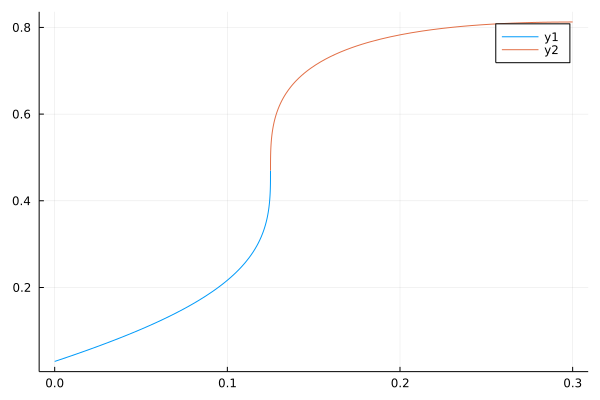

In [250]:
plot!(x->mid(T_left_geq_1_8(x, 0.023288528303070)), 1//8, 0.3)

In [251]:
T_right(x, b) =C*(BigInt(10)*x*exp(-10//3*x))^(19)+b

T_right (generic function with 1 method)

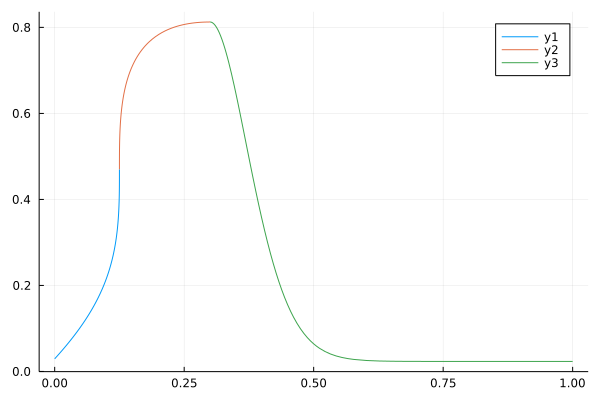

In [252]:
plot!(x->mid(T_right(x, 0.023288528303070)), 0.3, 1)

We want to certify now the value of $b$.

In [253]:
function T(x, b)
    if 0<=x<= 1//8
        return T_left_leq_1_8(x, b)
    elseif 1//8<x<0.3
        return T_left_geq_1_8(x, b)
    elseif x>=0.3
        return T_right(x, b)
    end
end

T (generic function with 1 method)

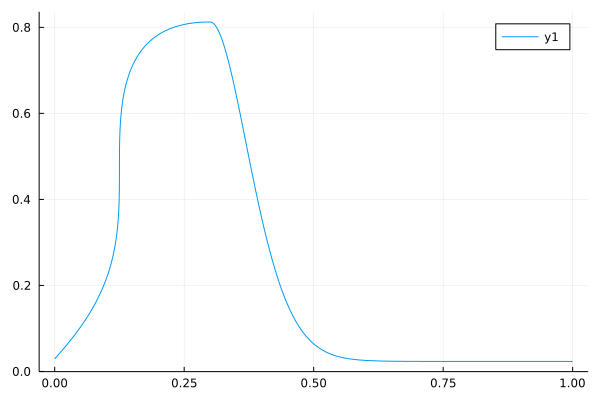

In [254]:
plot(x->mid(T(x, 0.023288528303070)), 0, 1)

We start with an educated guess, i.e., $b = 0.023288528303070$.

In [255]:
F(v) = [T(0.3, v[1])-v[2]; T(v[2], v[1])-v[3]; T(v[3],v[1])-v[4]; T(v[4], v[1])-v[5]; T(v[5], v[1])-v[6]; T(v[6], v[1])-v[6]]

F (generic function with 1 method)

In [256]:
B = 0.023288528303070+10^(-15)*Interval{BigFloat}(-1, 1)

[0.0232885, 0.0232886]₂₅₆

In [257]:
x1 = T(0.3, B);
x2 = T(x1, B);
x3 = T(x2, B);
x4 = T(x3, B);
x5 = T(x4, B);

v = [x1; x2; x3; x4; x5]

5-element Vector{Interval{BigFloat}}:
 [0.812569, 0.81257]₂₅₆
 [0.0232895, 0.0232896]₂₅₆
 [0.0616674, 0.0616675]₂₅₆
 [0.12433, 0.124331]₂₅₆
 [0.392938, 0.392939]₂₅₆

In [258]:
F([B; v])

6-element Vector{Interval{BigFloat}}:
 [-2.00001e-15, 2.00001e-15]₂₅₆
 [-2.00019e-15, 2.00019e-15]₂₅₆
 [-5.12407e-15, 5.12407e-15]₂₅₆
 [-1.26823e-14, 1.26823e-14]₂₅₆
 [-4.94482e-13, 4.94482e-13]₂₅₆
 [-1.00082e-11, 1.09031e-11]₂₅₆

The vector $[b; v]$ is the starting point for our multivariate Newton Method.


In [259]:
der_r_fixed_c = substitute(der_r, (Dict(c => C)))
func_der_r = Symbolics.build_function(der_r_fixed_c, x, expression = Val(false))
expr_T_l_leq_1_8 = (A-(Interval{BigFloat}(1)/8-x)^(Interval{BigFloat}(1)/3))*exp(-x)+b
der_expr_T_l_leq_1_8 = expand_derivatives(D(expr_T_l_leq_1_8))
der_T_l_leq_1_8_func = Symbolics.build_function(der_expr_T_l_leq_1_8, x, expression = Val(false))
expr_T_l_geq_1_8 = (A+(x-Interval{BigFloat}(1)/8)^(Interval{BigFloat}(1)/3))*exp(-x)+b
der_expr_T_l_geq_1_8 = expand_derivatives(D(expr_T_l_geq_1_8))
der_T_l_geq_1_8_func = Symbolics.build_function(der_expr_T_l_geq_1_8, x, expression = Val(false))

function der_T(x)
    if 0<=x<= 1//8
        return der_T_l_leq_1_8_func(x)
    elseif 1//8<x<0.3
        return der_T_l_geq_1_8_func(x)
    elseif x>=0.3
        return func_der_r(x)
    end
end

der_T (generic function with 1 method)

In [262]:
diam(der_T(Interval{BigFloat}(0.7)))

1.103135592779641950195834788724894788966770359051040630040137122947316218607076e-77

In [263]:
function Jac(v)
    n = length(v)
    J = zeros(Interval{BigFloat}, (n,n))
    J[:, 1] = ones(BigFloat, n)
    for i in 1:(n-1)
        J[i, i+1] = -1
    end
    J[n, n]= -1

    for i in 2:n
        J[i, i] += der_T(v[i])
    end

    return J
end

Jac (generic function with 1 method)

In [264]:
w = [B; v]
J = Jac(w)

6×6 Matrix{Interval{BigFloat}}:
 [1, 1]₂₅₆  …    [0, 0]₂₅₆
 [1, 1]₂₅₆       [0, 0]₂₅₆
 [1, 1]₂₅₆       [0, 0]₂₅₆
 [1, 1]₂₅₆       [0, 0]₂₅₆
 [1, 1]₂₅₆     [-1, -1]₂₅₆
 [1, 1]₂₅₆  …          [-6.53727, -6.53726]₂₅₆

In [270]:
maximum(diam.(Jac(w)))

5.661067472882481827355509194458876425817356890601441582766177557430127155790245455144800923878262253974976712871930214875822753713065371047159833057146894319210664095929387893967131439872743424157811977931356869286875554415879205402895583675456859932212002722787279287261246016418972985605025671410226256437314e-14

In [275]:
w_next = mid.(w)-inv(Jac(w))*F(Interval{BigFloat}.(mid.(w)))
w = w_next
maximum(diam.(w))

3.598025436641309043667198842604413120358930887538252472414044828639606490840157501933571025509695723189974973820045238180791815395586140013289341107259335672609985158821889545476765330164320695608891660561198828169335926497277737470677197550659761889909344231210826584645848410899895281141233477996344254251519e-17

In [268]:
setprecision(1024)
F(w)

6-element Vector{Interval{BigFloat}}:
 [-2.96352e-17, 2.96352e-17]₁₀₂₄
 [-2.96359e-17, 2.96359e-17]₁₀₂₄
 [-8.44525e-17, 8.44525e-17]₁₀₂₄
 [-8.15606e-17, 8.15606e-17]₁₀₂₄
 [-6.14016e-17, 6.14016e-17]₁₀₂₄
 [-1.10663e-16, 1.10663e-16]₁₀₂₄

In [206]:
using Plots

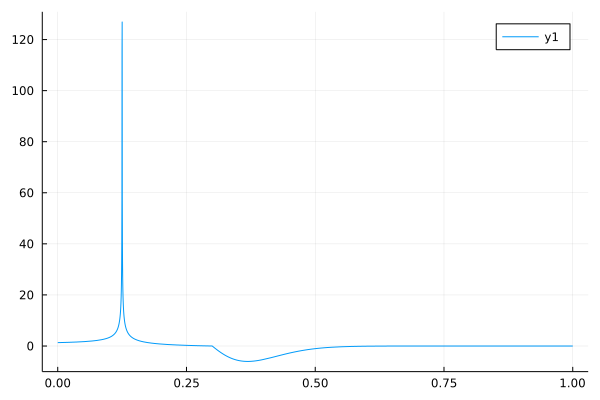

In [172]:
plot(x->mid(der_T(x)), 0, 1)